In [1]:
from map_manager.map_generator import map
from map_manager.lloyd_relaxation import relax, voronoi
import numpy as np
import matplotlib.pyplot as plt
from character_engine.player_character import npc
from scipy.spatial import Voronoi, voronoi_plot_2d,  cKDTree
import random

ModuleNotFoundError: No module named 'lloyd_relaxation'

In [4]:
deniz = map()

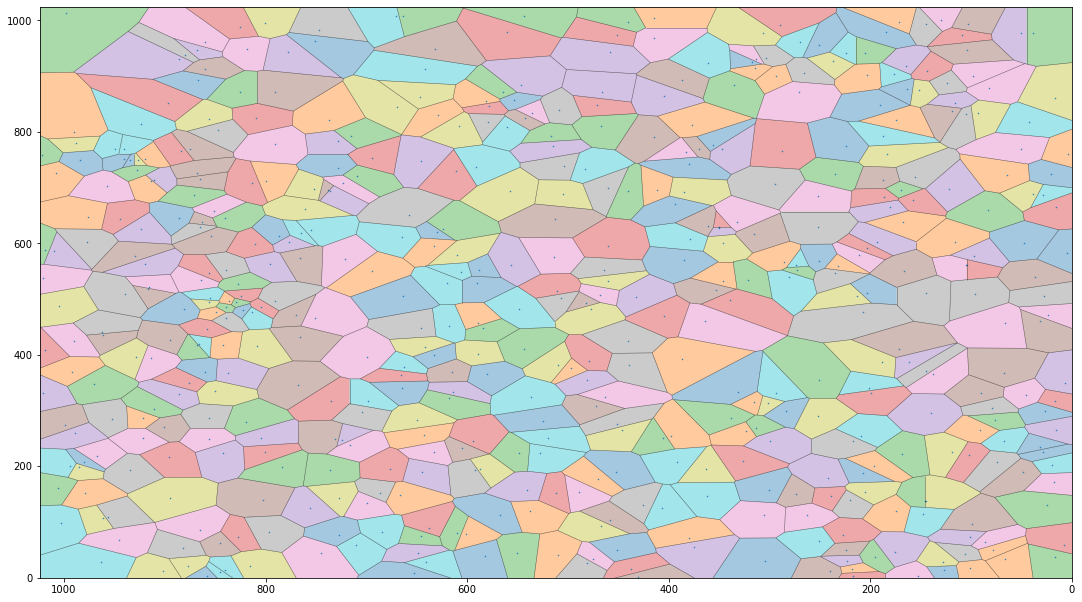

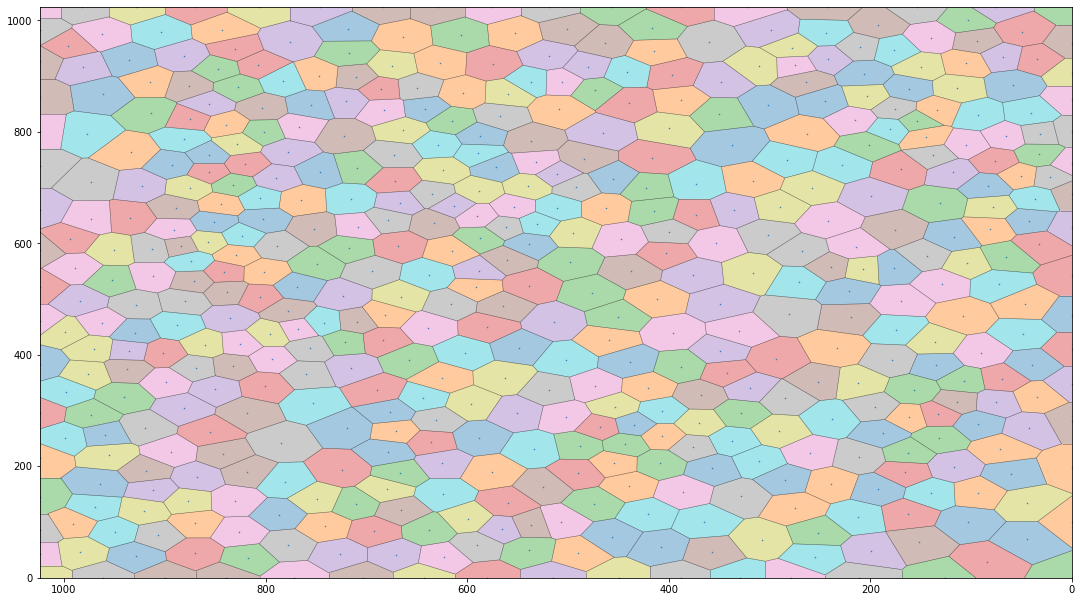

In [5]:
deniz.populate_map(n_locations=512, print=True, name="b",relaxed=False,k=100)
deniz.populate_map(n_locations=512, print=True, name="a",relaxed=True,k=100)

In [6]:
from noise import snoise3

def noise_map(size, res, seed, octaves=1, persistence=0.5, lacunarity=2.0):
    scale = size/res
    return np.array([[
        snoise3(
            (x+0.1)/scale,
            y/scale,
            seed,
            octaves=octaves,
            persistence=persistence,
            lacunarity=lacunarity
        )
        for x in range(size)]
        for y in range(size)
    ])



In [7]:
from skimage.draw import polygon

def voronoi_map(vor, size):
    # Calculate Voronoi map
    vor_map = np.zeros((size, size), dtype=np.uint32)

    for i, region in enumerate(vor.regions):
        # Skip empty regions and infinte ridge regions
        if len(region) == 0 or -1 in region: continue
        # Get polygon vertices    
        x, y = np.array([vor.vertices[i][::-1] for i in region]).T
        # Get pixels inside polygon
        rr, cc = polygon(x, y)
        # Remove pixels out of image bounds
        in_box = np.where((0 <= rr) & (rr < size) & (0 <= cc) & (cc < size))
        rr, cc = rr[in_box], cc[in_box]
        # Paint image
        vor_map[rr, cc] = i

    return vor_map


In [9]:
b = voronoi_map(deniz.vors["b"], 1024)
a = voronoi_map(deniz.vors["a"], 1024)

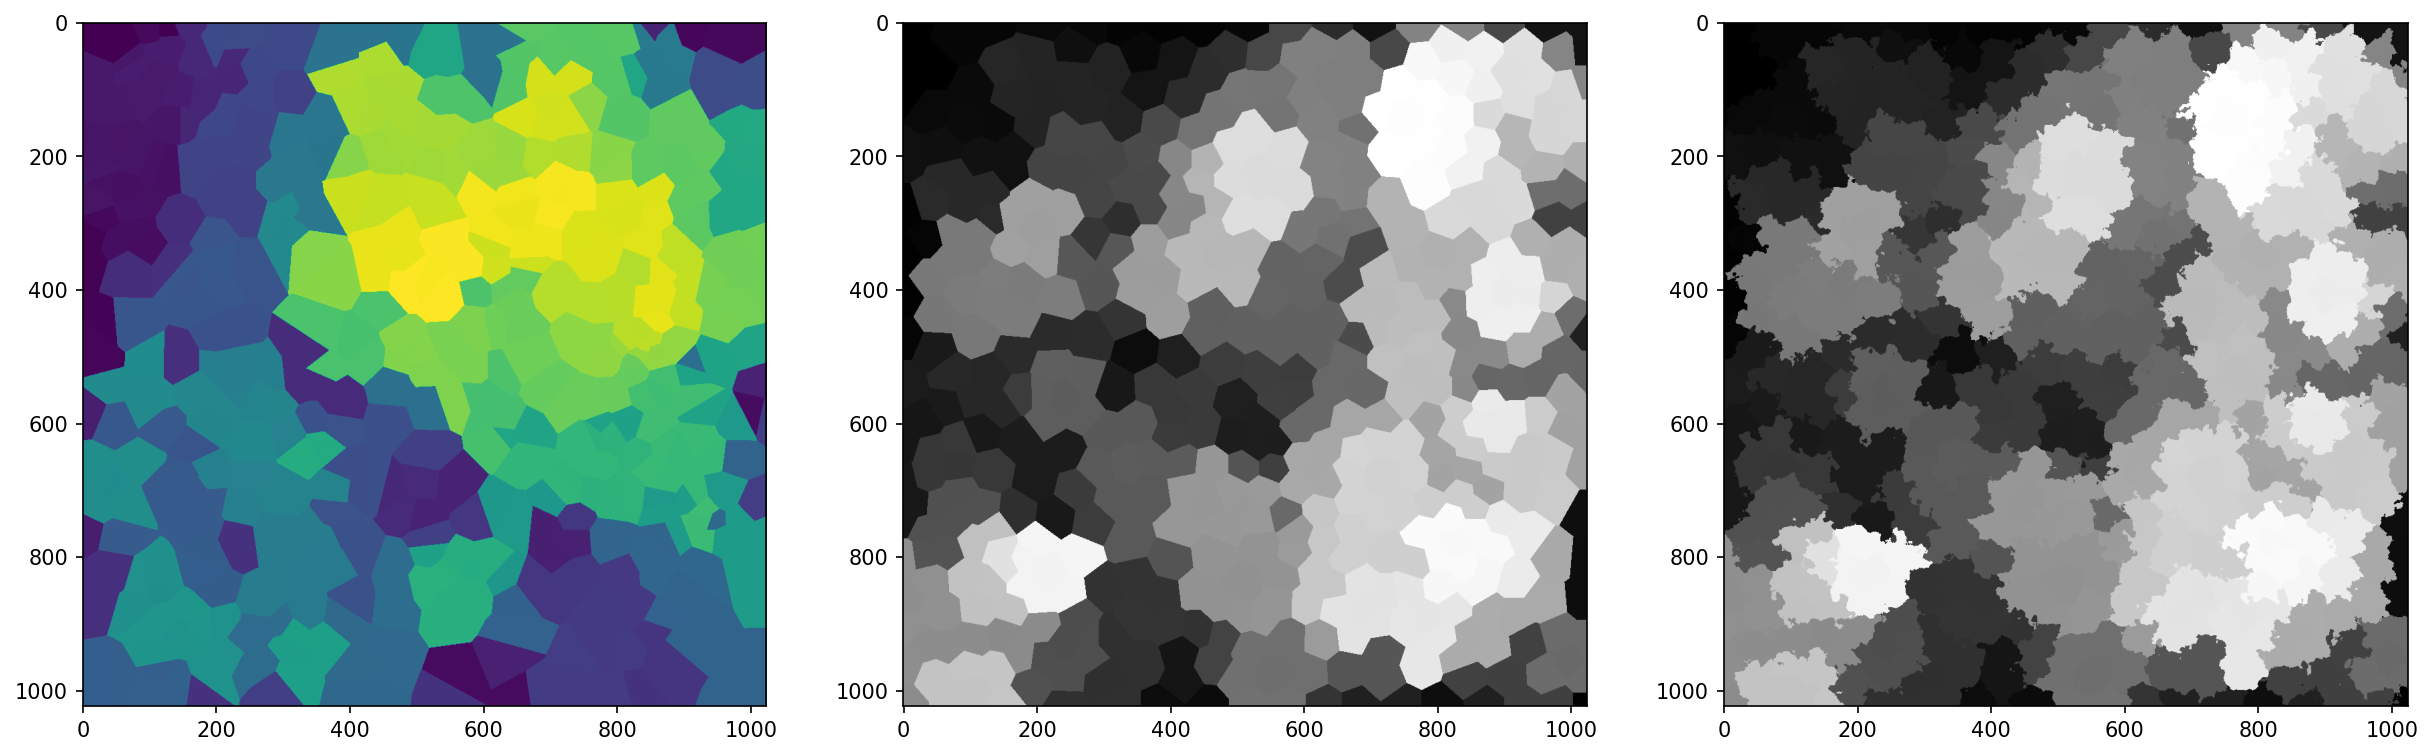

In [10]:
size=1024



fig, axes = plt.subplots(1, 3)
fig.set_dpi(150)
fig.set_size_inches(20, 14)
axes[0].imshow(b)
axes[1].imshow(a,cmap="gray")
axes[2].imshow(blurred_vor_map,cmap="gray")

In [54]:
import noise
import numpy as np

def toddler(size=1024, scale = 500, octaves = 20, persistence = 0.60, lacunarity = 2, mask=False):
    shape = (size,size)

    map = np.zeros(shape)

    for i in range(shape[0]):

        for j in range(shape[1]):

            map[i][j] = noise.pnoise2(i/scale, 
                                        j/scale, 
                                        octaves=octaves, 
                                        persistence=persistence, 
                                        lacunarity=lacunarity, 
                                        repeatx=size, 
                                        repeaty=size, 
                                        base=0)
    if mask:
        map = map > 0
        
    return map

In [55]:
mask = toddler(mask=True)

fig, axes = plt.subplots(1, 1)
fig.set_dpi(150)
fig.set_size_inches(20, 14)
axes.imshow(blurred_vor_map*mask,cmap)

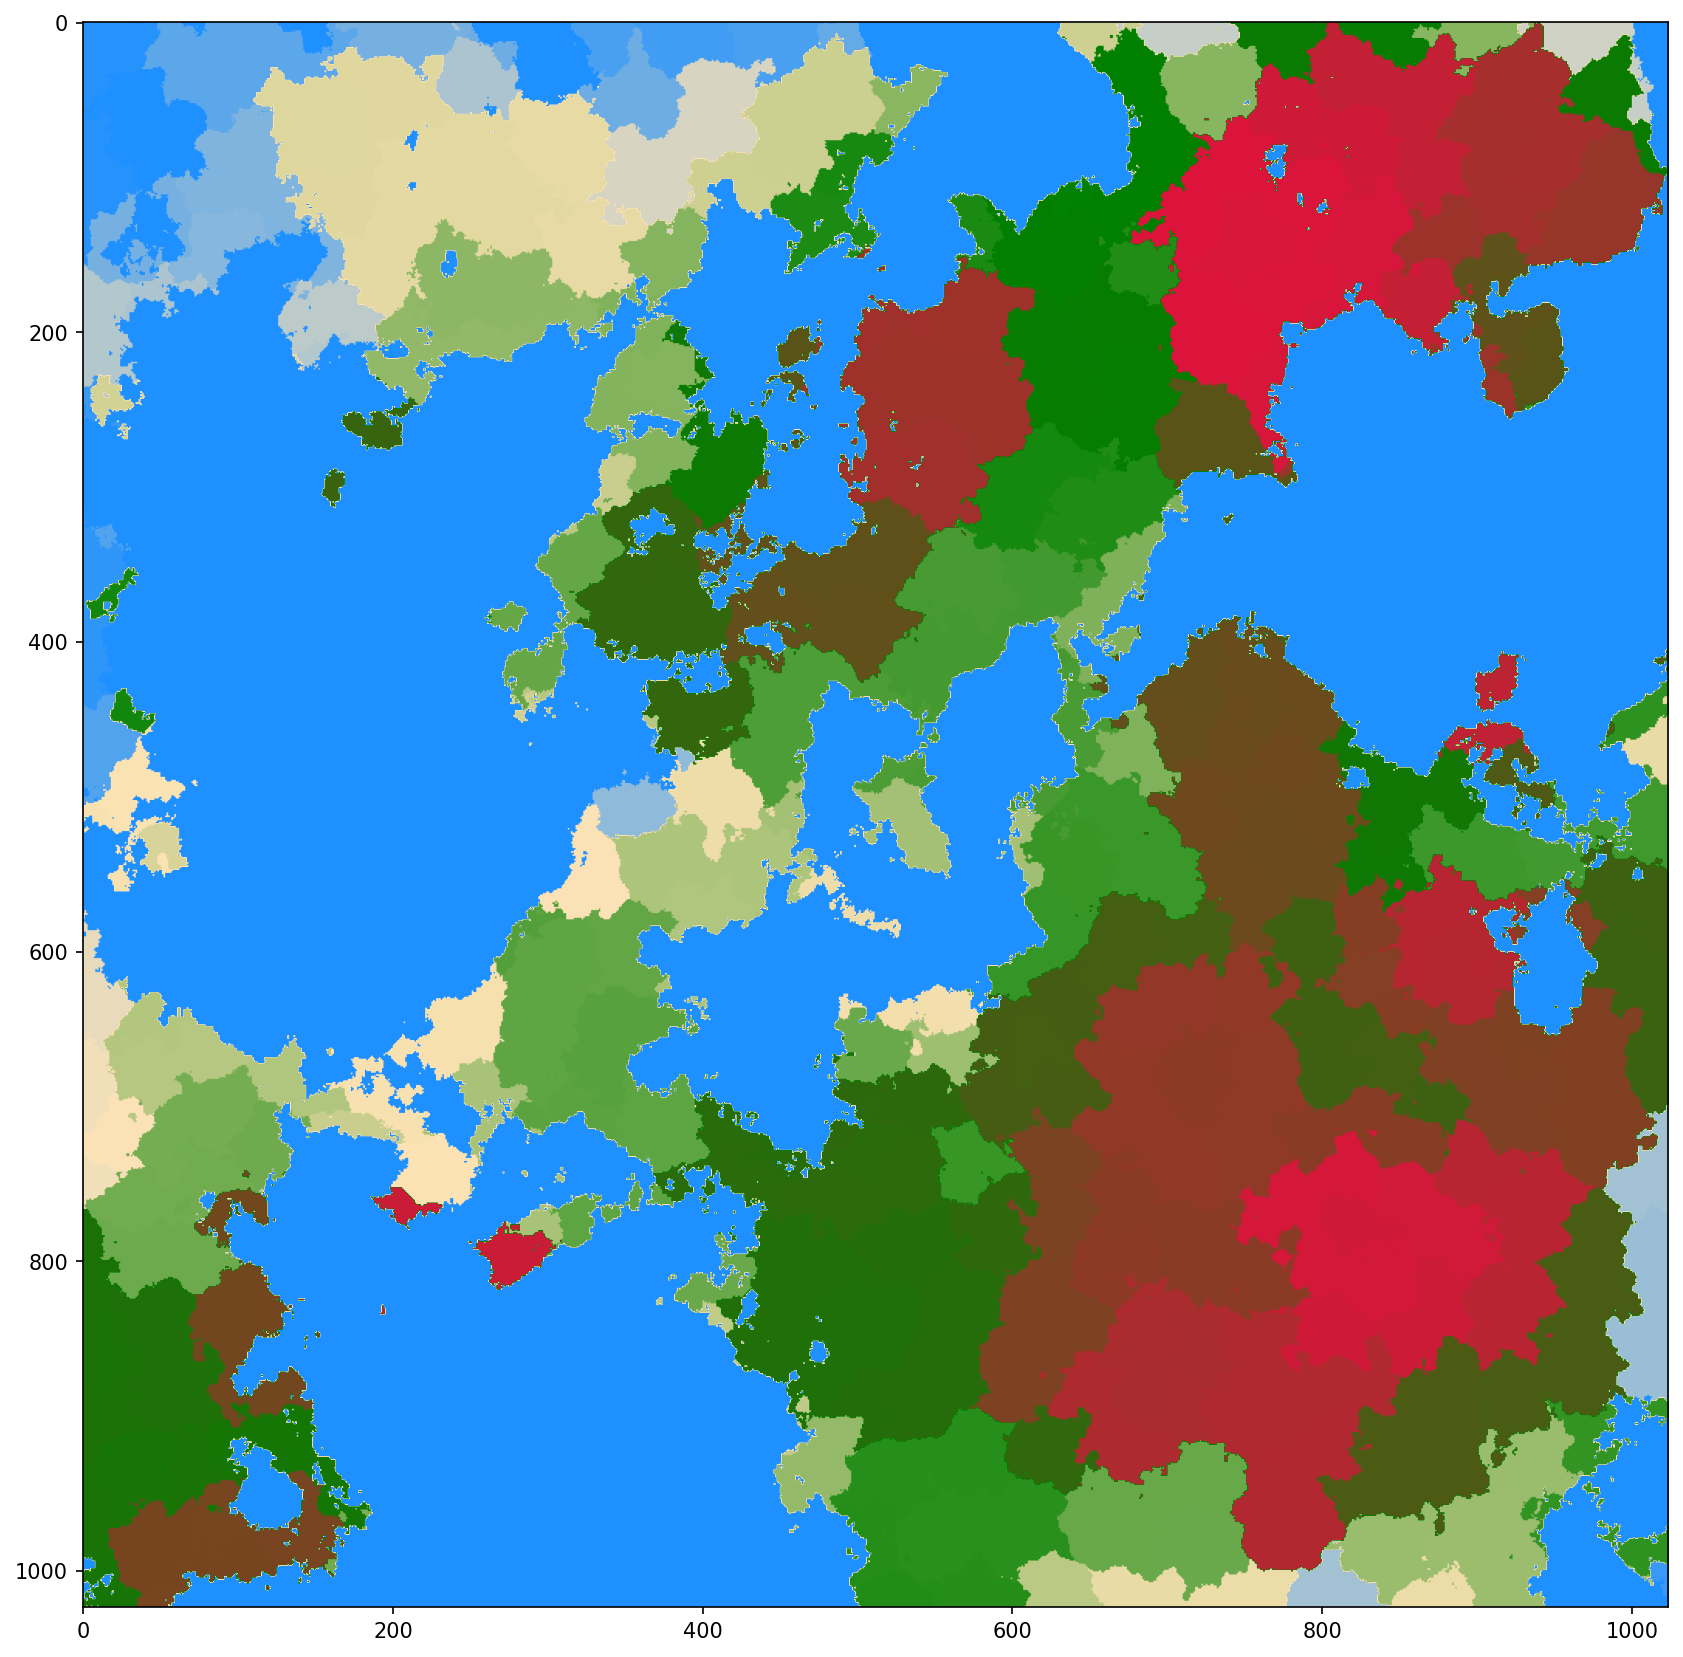

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

cvals  = [0, 0.1,0.5,1]
colors = ["dodgerblue","moccasin","green","crimson"]

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(cvals, colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

fig, axes = plt.subplots(1, 1)
fig.set_dpi(150)
fig.set_size_inches(20, 14)
axes.imshow(blurred_vor_map*mask,cmap)



#### MAP Yapılacaklar

##### Map generation:

- Sıcalık, yağmur fonksyionunu yaz ki hepsi için oluşturabil.
- Noise map, blur fonksyionlarını classa ekle.
- Sıcaklık, yağmura göre map işaretleme ve mask generation fonksyionu
- Map view paramaetrelerini belirleyip bütün kodu runla.